# SOM Model

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
#import the dataset
df = pd.read_csv('rating.csv')
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/otherlodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens,Av_Experience,Experience
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.569167,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.581667,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.580417,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.590417,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.70,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.580417,0


In [4]:
df = df.drop(['Av_Experience'], axis = 1)

In [5]:
X = df.iloc [: ,:-1].values    # independent variables
y = df.iloc [: , -1].values    # dependent variables

# Building SOM Model

In [7]:
# import the SOM model
from minisom import MiniSom

In [8]:
# init the model
som = MiniSom( x = 10, y = 10, input_len = 24, sigma = 1.0, learning_rate = 0.5)

In [9]:
# init the weight
som.random_weights_init(X)

In [10]:
#training the model
som.train_random(data = X, num_iteration = 1000)

In [17]:
#som.distance_map()

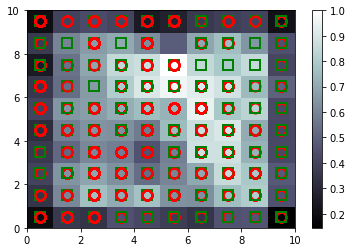

In [12]:
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o' , 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [13]:
som.quantization_error(X)

11.330215847101048

In [20]:
#mappings = som.win_map(X)
#mappings

In [19]:
#mappings.keys()

In [18]:
#len(mappings.keys())